<a href="https://colab.research.google.com/github/nohjuhyeon/study_data_analytics/blob/main/docs/quests/DDA/SpineSurgeryList_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as pit
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df_surgery=pd.read_csv("/content/SpineSurgeryList.csv")
df_surgery

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


In [5]:
df_surgery.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')


## 입원 일자 시각화

In [6]:
df_surgery['퇴원일자'].value_counts()

20120229    46
20190201    23
20190301    20
20190103    19
20190131    15
            ..
20110603     1
20170713     1
20100911     1
20100914     1
20170413     1
Name: 퇴원일자, Length: 1012, dtype: int64

In [7]:
enter_date = pd.to_datetime(df_surgery['입원일자'],format='%Y%m%d')
leave_date = pd.to_datetime(df_surgery['퇴원일자'],format='%Y%m%d')
period_date = leave_date - enter_date
df_date_hospital = pd.DataFrame(enter_date)
df_date_hospital['퇴원일자'] = pd.DataFrame(leave_date)
df_date_hospital['입원기간'] = period_date
df_date_hospital['입원기간'] = df_date_hospital['입원기간'].dt.days
df_date_hospital['환자ID'] = pd.DataFrame(df_surgery['환자ID'])
df_date_hospital

,입원일자,퇴원일자,입원기간,환자ID
0,2019-07-13,2019-07-16,3,1PT
1,2019-07-15,2019-07-16,1,2PT
2,2019-07-29,2019-08-01,3,3PT
3,2019-07-31,2019-08-03,3,4PT
4,2019-09-03,2019-09-07,4,5PT
...,...,...,...,...
1889,2017-04-07,2017-04-08,1,1890PT
1890,2017-04-26,2017-04-29,3,1891PT
1891,2017-04-10,2017-04-12,2,1892PT
1892,2017-04-08,2017-04-11,3,1893PT


In [8]:
df_date_hospital=df_date_hospital.sort_values(by='입원기간',ascending=False)
long_date = df_date_hospital[:5]
df_date_hospital=df_date_hospital.sort_values(by='입원기간',ascending=True)
short_date = df_date_hospital[:5]

### 길게 입원한 환자

In [9]:
long_date

,입원일자,퇴원일자,입원기간,환자ID
1019,2009-01-30,2012-02-29,1125,1020PT
1014,2010-02-02,2012-02-29,757,1015PT
1033,2010-04-26,2012-02-29,674,1034PT
1034,2011-01-27,2012-02-29,398,1035PT
1031,2011-04-17,2012-02-29,318,1032PT


Text(0.5, 1.0, '오래 입원한 환자 TOP 5')

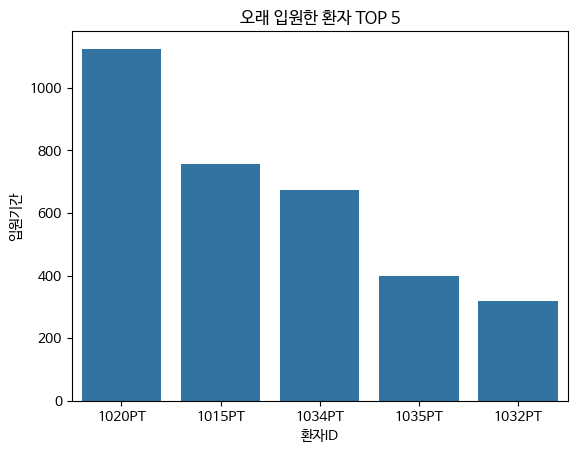

In [10]:
sns.barplot(data = long_date, x='환자ID', y='입원기간')
pit.title("오래 입원한 환자 TOP 5")

### 짧게 입원한 환자

In [11]:
short_date

,입원일자,퇴원일자,입원기간,환자ID
1030,2018-01-23,2012-02-29,-2155,1031PT
1026,2017-12-15,2012-02-29,-2116,1027PT
998,2017-10-19,2012-02-29,-2059,999PT
1006,2017-07-03,2012-02-29,-1951,1007PT
1009,2017-06-07,2012-02-29,-1925,1010PT


Text(0.5, 1.0, '짧게 입원한 환자 TOP 5')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


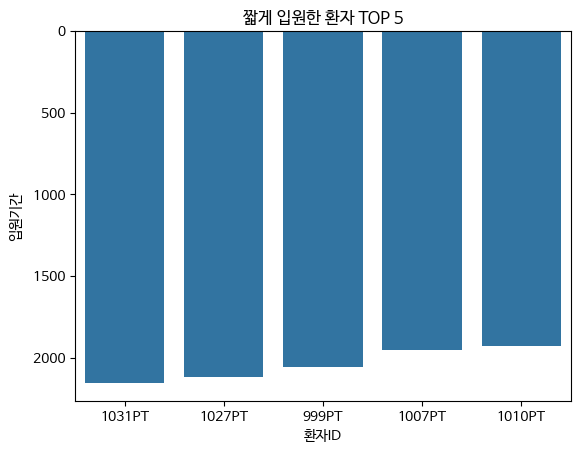

In [12]:
sns.barplot(data = short_date, x='환자ID', y='입원기간')
pit.title("짧게 입원한 환자 TOP 5")

##수술 일자 시각화

In [13]:
df_injury_date = pd.DataFrame(df_surgery['수술일자'])
df_injury_date['수술일자'] = pd.to_datetime(df_injury_date['수술일자'],format="%Y%m%d")
df_injury_date['수술일자_year'] = df_injury_date['수술일자'].dt.year
df_injury_date['수술일자_month'] = df_injury_date['수술일자'].dt.month
df_injury_date['수술일자_day'] = df_injury_date['수술일자'].dt.day
df_injury_date['수술일자_week'] = df_injury_date['수술일자'].dt.isocalendar().week
df_injury_date['수술일자_quater'] = df_injury_date['수술일자'].dt.quarter


df_injury_date

,수술일자,수술일자_year,수술일자_month,수술일자_day,수술일자_week,수술일자_quater
0,2019-07-15,2019,7,15,29,3
1,2019-07-16,2019,7,16,29,3
2,2019-07-31,2019,7,31,31,3
3,2019-08-02,2019,8,2,31,3
4,2019-09-06,2019,9,6,36,3
...,...,...,...,...,...,...
1889,2017-04-07,2017,4,7,14,2
1890,2017-04-27,2017,4,27,17,2
1891,2017-04-11,2017,4,11,15,2
1892,2017-04-10,2017,4,10,15,2


### 년도별 수술 횟수

In [14]:
df_injury_date['수술일자_year'].value_counts()

2019    771
2011    202
2020    182
2012    150
2009    101
2016    100
2014     98
2017     78
2015     75
2013     68
2010     67
2018      2
Name: 수술일자_year, dtype: int64

Text(0.5, 1.0, '년도별 수술 횟수')

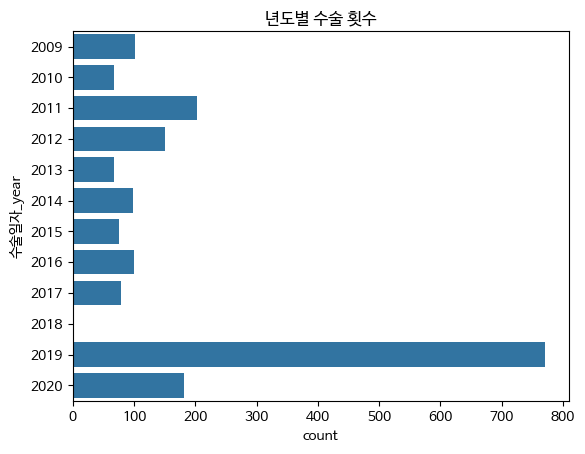

In [15]:
sns.countplot(data=df_injury_date,y='수술일자_year')
pit.title("년도별 수술 횟수")

### 월별 수술 횟수

In [16]:
df_injury_date['수술일자_month'].value_counts()

1     285
2     201
3     192
12    177
10    173
4     148
7     140
11    131
9     121
6     119
5     116
8      91
Name: 수술일자_month, dtype: int64

Text(0.5, 1.0, '월별 수술 횟수')

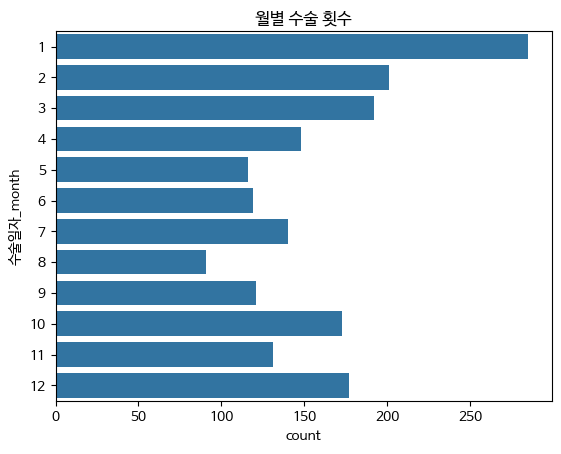

In [17]:
sns.countplot(data=df_injury_date,y='수술일자_month')
pit.title("월별 수술 횟수")

### 주차별 수술 횟수

In [18]:
df_injury_date['수술일자_week'].value_counts()

5     82
1     76
9     73
3     66
43    59
2     57
51    54
14    51
13    49
10    46
36    45
31    45
6     45
50    45
15    43
7     43
26    43
8     40
40    39
52    37
42    34
4     34
45    34
22    33
27    33
11    33
41    32
39    32
12    32
47    32
48    30
29    30
18    29
44    29
49    29
46    27
30    27
21    27
32    25
16    25
28    24
19    23
23    23
17    23
25    23
35    22
24    22
37    20
20    20
34    20
38    15
33    14
Name: 수술일자_week, dtype: Int64

Text(0.5, 1.0, '주차별 수술 횟수')

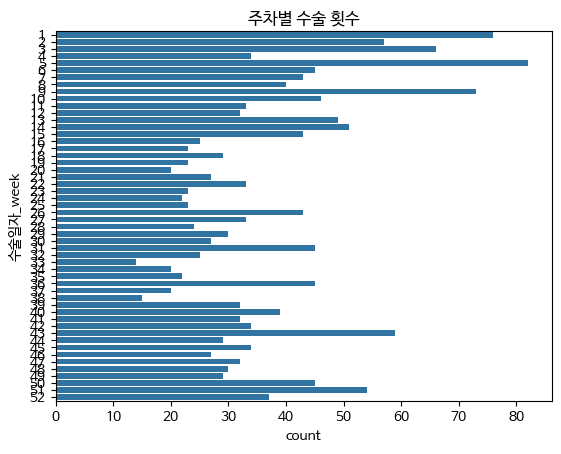

In [19]:
sns.countplot(data=df_injury_date,y='수술일자_week')
pit.title("주차별 수술 횟수")

### 일별 수술 횟수

In [20]:
df_injury_date['수술일자_day'].value_counts()

28    88
3     82
1     78
31    77
2     74
10    70
11    70
6     69
25    68
30    68
27    67
16    67
7     66
21    66
22    63
18    62
24    60
14    60
29    59
19    58
12    56
4     55
8     55
23    53
5     51
15    48
9     46
13    43
20    41
26    37
17    37
Name: 수술일자_day, dtype: int64

Text(0.5, 1.0, '일별 수술 횟수')

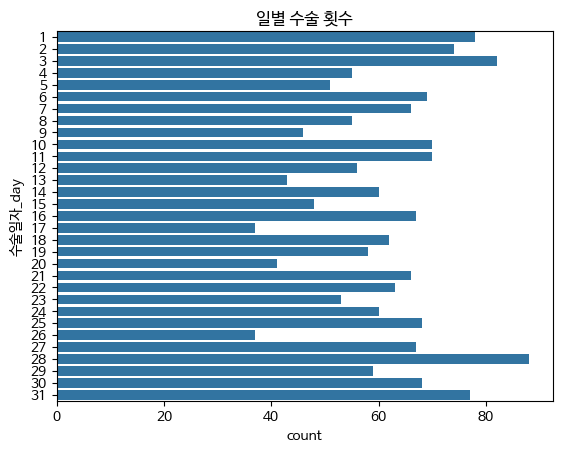

In [21]:
sns.countplot(data=df_injury_date,y='수술일자_day')
pit.title("일별 수술 횟수")